### Problem Statement
You are a data scientist / AI engineer at an educational consulting firm. You have been provided with a dataset named **`"student_scores.csv"`**, which includes records of the number of hours students studied and the marks they obtained. The dataset comprises the following columns:

- `hours:` The number of hours a student studied.
- `scores:` The marks obtained by the student.

Your task is to use this dataset to build a polynomial regression model to predict the marks of students based on the number of hours they studied. You will need to split the data into training and test sets, train the model, and evaluate its performance using appropriate metrics.

**Import Necessary Libraries**

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Task 1: Data Preparation and Exploration

1. Import the data from the `"student_scores.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Visualize the relationship between the number of hours studied and the marks obtained.

In [94]:
# Step 1: Import the data from the "student_study_hours.csv" file and store it in a variable 'df'
df = pd.read_csv('student_scores.csv')

# Step 2: Display the number of rows and columns in the dataset
df.shape

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


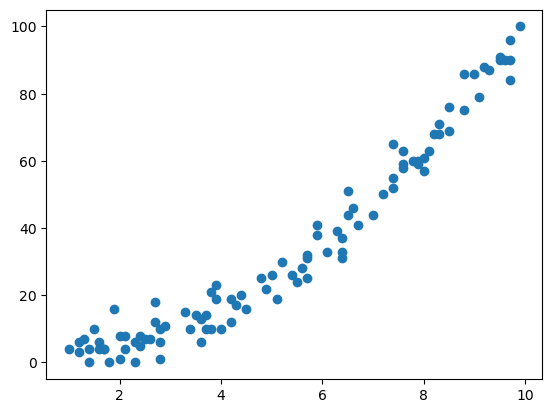

In [13]:
# Step 4: Visusualize the relationship between the number of hours studied and the marks obtained
plt.scatter(df['hours'],df['scores'])
plt.show()

### Task 2: Train a Polynomial Regression Model

1. Select the feature (hours) and the target variable (scores) for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets.
4. Create a Linear Regression model and fit it using the transformed training data.
5. Print the model's coefficients and intercept.

In [44]:
# Step 1: Select the feature and target variable for modeling
X = df[['hours']]
y = df['scores']

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# Step 3: Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)

In [48]:
# Step 4: Create a Linear Regression model and fit it using the transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

# Assistant
The error occurs because the `PolynomialFeatures` transformer expects a 2-dimensional array (like a DataFrame or a 2D NumPy array), but it received a 1-dimensional Series instead. 

To fix this, you need to ensure that `X_train` is a 2D structure. If `X_train` is a Series, you can convert it to a DataFrame or reshape it to be 2D.

Would you like me to provide the corrected code?

In [50]:
# Print the model's coefficients and intercept
model.coef_,model.intercept_

(array([ 0.        , -4.4308579 ,  1.71393503, -0.03669951]),
 7.691872832731704)

### Task 3: Model Evaluation
1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.

In [64]:
# Step 1: Make predictions on the test set using the trained model
X_test_poly = poly.fit_transform(X_test)
y_pred = model.predict(X_test_poly)
y_pred
# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Step 3: Print the MSE and R2 values
mse, r2

(15.028613094999933, 0.9866904297085334)

In [86]:
#Curve Visualisation
x_insample = np.linspace(df['hours'].min(),df['hours'].max(),300).reshape(-1,1)
x_insample
x_insample_poly = poly.transform(x_insample)
y_out = model.predict(x_insample_poly)

C:\Users\Sumit Sah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [90]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

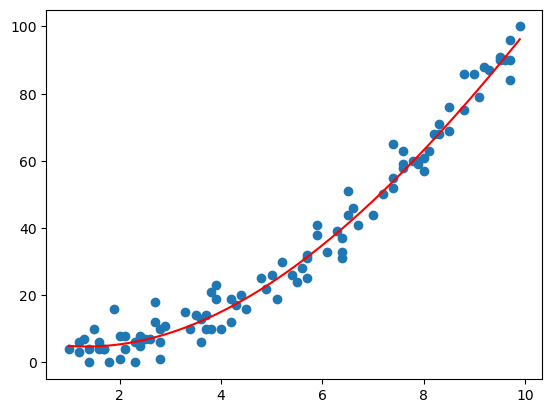

In [88]:
plt.scatter(df['hours'],df['scores'])
plt.plot(x_insample, y_out, color='red')